In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('data\weekly_sales.csv')
df = df.rename(columns= { 'week' : 'ds', 'weekly_quantity': 'y'})
df = df.sort_values('ds')
df

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Asus\AppData\Local\Temp\ipykernel_11448\1405331036.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('data\weekly_sales.csv')


,ds,y,weekly_total_amount
0,2023-04-24,1240,60840.787854
1,2023-05-01,9657,481984.084105
2,2023-05-08,9554,476509.160280
3,2023-05-15,9198,458240.848777
4,2023-05-22,9700,481252.924503
5,2023-05-29,9598,479776.144245
6,2023-06-05,9661,474594.408139
7,2023-06-12,9556,482094.301263
8,2023-06-19,9565,471040.740195
9,2023-06-26,9935,490290.312243


In [4]:
train = df[:-12].copy()
test = df[-12:].copy()

**PROPHET forecast**

In [5]:
from prophet import Prophet

In [6]:
prophet_model = Prophet()
prophet_model.fit(train)

11:43:39 - cmdstanpy - INFO - Chain [1] start processing
11:43:40 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = prophet_model.make_future_dataframe(periods = 12, freq = 'W-MON')
forecast_prophet = prophet_model.predict(future)
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-24,8810.316620,7206.645662,10498.553877,8810.316620,8810.316620,0.0,0.0,0.0,0.0,0.0,0.0,8810.316620
1,2023-05-01,8840.955996,7178.823437,10487.184010,8840.955996,8840.955996,0.0,0.0,0.0,0.0,0.0,0.0,8840.955996
2,2023-05-08,8871.595373,7250.427710,10471.779188,8871.595373,8871.595373,0.0,0.0,0.0,0.0,0.0,0.0,8871.595373
3,2023-05-15,8902.234749,7375.845763,10622.582343,8902.234749,8902.234749,0.0,0.0,0.0,0.0,0.0,0.0,8902.234749
4,2023-05-22,8932.874125,7126.124284,10497.949172,8932.874125,8932.874125,0.0,0.0,0.0,0.0,0.0,0.0,8932.874125
5,2023-05-29,8963.513501,7363.931730,10503.846664,8963.513501,8963.513501,0.0,0.0,0.0,0.0,0.0,0.0,8963.513501
6,2023-06-05,8994.152877,7474.889708,10612.145670,8994.152877,8994.152877,0.0,0.0,0.0,0.0,0.0,0.0,8994.152877
7,2023-06-12,9024.792253,7362.420570,10723.159176,9024.792253,9024.792253,0.0,0.0,0.0,0.0,0.0,0.0,9024.792253
8,2023-06-19,9055.431629,7427.677324,10671.711612,9055.431629,9055.431629,0.0,0.0,0.0,0.0,0.0,0.0,9055.431629
9,2023-06-26,9086.071005,7464.064426,10786.635079,9086.071005,9086.071005,0.0,0.0,0.0,0.0,0.0,0.0,9086.071005


In [10]:
test['ds'] = pd.to_datetime(test['ds'])

In [12]:
forecast_joined = test.merge(forecast_prophet[['ds','yhat']], on ='ds', how = 'left')
forecast_joined

,ds,y,weekly_total_amount,yhat
0,2024-02-05,9573,465512.384259,10066.422917
1,2024-02-12,9571,473763.324776,10097.057968
2,2024-02-19,9726,482920.872640,10127.693020
3,2024-02-26,9335,458221.604570,10158.328071
4,2024-03-04,9434,468926.682361,10188.963122
5,2024-03-11,10000,487566.714469,10219.598174
6,2024-03-18,9476,471458.954083,10250.233225
7,2024-03-25,9690,480083.067393,10280.868276
8,2024-04-01,9670,483742.311774,10311.503328
9,2024-04-08,9355,465631.029067,10342.138379


In [16]:
eval_df = forecast_joined.dropna(subset = ['y', 'yhat'])

In [17]:
rmse_prophet = sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
rmse_prophet = round(rmse_prophet, 2)
rmse_prophet

707.16

**ARIMA forecast**

In [18]:
import pmdarima as pm

In [45]:
ts_train = train.set_index('ds')['y']
arima_model = pm.auto_arima(ts_train, seasonal = False, suppress_warnings= True)

In [54]:
arima_forecast = arima_model.predict(n_periods = 12)
arima_forecast

2024-02-05    9418.268293
2024-02-12    9418.268293
2024-02-19    9418.268293
2024-02-26    9418.268293
2024-03-04    9418.268293
2024-03-11    9418.268293
2024-03-18    9418.268293
2024-03-25    9418.268293
2024-04-01    9418.268293
2024-04-08    9418.268293
2024-04-15    9418.268293
2024-04-22    9418.268293
Freq: W-MON, dtype: float64

In [55]:
rmse_arima = sqrt(mean_squared_error(test['y'], arima_forecast))
rmse_arima = round(rmse_arima, 2)
rmse_arima

233.46

*COMPARISION*

In [ ]:
arima_forecast = np.array(arima_forecast).flatten()

arima_dates = pd.to_datetime(test["ds"].reset_index(drop=True))

arima_forecast_df = pd.DataFrame({
    "ds": arima_dates,
    "yhat_arima": pd.Series(arima_forecast)
})


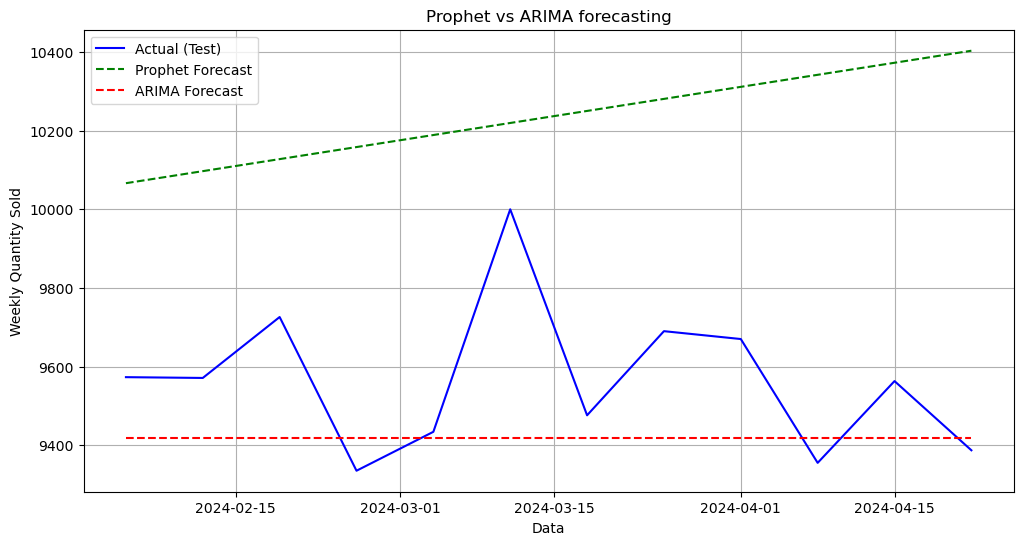

In [59]:
plt.figure(figsize= (12,6))
# plt.plot(train['ds'], train['y'], label = 'Train Data', color = 'black')
plt.plot(test['ds'], test['y'], label = 'Actual (Test)', color = 'blue')
plt.plot(eval_df['ds'], eval_df['yhat'], label = 'Prophet Forecast', linestyle = '--', color = 'green')
plt.plot(arima_forecast_df["ds"], arima_forecast_df["yhat_arima"], label="ARIMA Forecast", linestyle="--", color="red")
plt.xlabel('Data')
plt.ylabel('Weekly Quantity Sold')
plt.title('Prophet vs ARIMA forecasting')
plt.legend()
plt.grid(True)
plt.savefig('images/Prophet vs ARIMA forecasting.png')
plt.show()

In [61]:
print("Prophet RMSE:", round(rmse_prophet, 2))
print("ARIMA RMSE:", round(rmse_arima, 2))


Prophet RMSE: 707.16
ARIMA RMSE: 233.46
